### Google Data Analytics Capstone Project

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Case Study Roadmap

## Ask Phase
Guiding questions

● What is the problem you are trying to solve?

● How can your insights drive business decisions?

### Problem Statement / Business task
Designing marketing strategies aimed at converting casual riders into annual members

### Benefit  
The insights generated from the analysis will enable the marketing team convert casual riders into annual members which would generate more revenue for the company as this will be a key future to the growth of company.


### Key stakeholders:
1. Lily Moreno: The director of marketing and my manager
2. Cyclistic marketing analytics team
3. Cyclistic executive team

## Prepare Phase

The data is organized in rows and columns (2-D). It is a public dataset and license has been granted for exploration and storage. The integrity and credibility of the data is ascertained and the data does not seem to contain any bias.

## Process Phase

### Importing the datasets

In [2]:
dp = pd.read_csv('202207-divvy-tripdata.csv')

In [3]:
dp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


In [4]:
dp2 = pd.read_csv('202208-divvy-tripdata.csv')
dp3 = pd.read_csv('202209-divvy-publictripdata.csv')
dp4 = pd.read_csv('202210-divvy-tripdata.csv')
dp5 = pd.read_csv('202211-divvy-tripdata.csv')
dp6 = pd.read_csv('202212-divvy-tripdata.csv')
dp7 = pd.read_csv('202207-divvy-tripdata.csv')
dp8 = pd.read_csv('202301-divvy-tripdata.csv')
dp9 = pd.read_csv('202302-divvy-tripdata.csv')
dp10 = pd.read_csv('202303-divvy-tripdata.csv')
dp11 = pd.read_csv('202304-divvy-tripdata.csv')
dp12 = pd.read_csv('202305-divvy-tripdata.csv')
dp13 = pd.read_csv('202306-divvy-tripdata.csv')

### Verifying the consistency of column names

In [5]:
dp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [6]:
dp2.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [7]:
dp3.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [8]:
dp4.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [9]:
dp5.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [10]:
dp6.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [11]:
dp7.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [12]:
dp8.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [13]:
dp9.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [14]:
dp10.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [15]:
dp11.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [16]:
dp12.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [17]:
dp13.columns == dp.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

The datasets have consistent column names

### Merging the datasets into a single dataframe

In [18]:
df = pd.concat([dp, dp2, dp3, dp4, dp5, dp6, dp7, dp8, dp9, dp10, dp11, dp12, dp13])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


#### Performing descriptive analysis on the data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6602932 entries, 0 to 719617
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 705.3+ MB


In [20]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,6.602932e+06,6.602932e+06,6.596190e+06,6.596190e+06
mean,4.190313e+01,-8.764765e+01,4.190334e+01,-8.764769e+01
std,4.527256e-02,2.822505e-02,6.873937e-02,1.115831e-01
min,4.164000e+01,-8.787000e+01,0.000000e+00,-8.816000e+01
25%,4.188103e+01,-8.766124e+01,4.188103e+01,-8.766141e+01
50%,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01
75%,4.193000e+01,-8.762991e+01,4.193000e+01,-8.762991e+01
max,4.207000e+01,-8.752000e+01,4.237000e+01,0.000000e+00


### Data cleaning operations

In [21]:
# Checking for duplicates in the dataframe
df.duplicated().sum()

823488

In [22]:
# Checking for null values in the dataframe
df.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     969891
start_station_id       970023
end_station_name      1036606
end_station_id        1036747
start_lat                   0
start_lng                   0
end_lat                  6742
end_lng                  6742
member_casual               0
dtype: int64

In [23]:
# Dropping null values
df.dropna(inplace = True)

In [24]:
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [25]:
# Dropping duplicates in the data
df.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719573,A266C6FA4EA2D673,electric_bike,2023-06-22 16:48:38,2023-06-22 17:01:09,Clinton St & Washington Blvd,WL-012,Morgan Ave & 14th Pl,TA1306000002,41.883364,-87.641368,41.862378,-87.651062,member
719576,D9E50AEA4B3020F6,docked_bike,2023-06-22 19:36:17,2023-06-22 20:06:38,California Ave & Cortez St,17660,California Ave & Division St,13256,41.900363,-87.696704,41.903029,-87.697474,casual
719590,F203F7BEAF3E4771,classic_bike,2023-06-12 14:01:13,2023-06-12 14:10:13,California Ave & Cortez St,17660,California Ave & Milwaukee Ave,13084,41.900363,-87.696704,41.922695,-87.697153,member
719604,6B5529395EB391D4,electric_bike,2023-06-20 18:34:37,2023-06-20 18:48:03,Ashland Ave & Wellington Ave,13269,Western Ave & Roscoe St,15634,41.936125,-87.669924,41.943034,-87.687288,casual


### Changing the data types to suitable formats

In [26]:
df['ride_id'] = df['ride_id'].astype(str)

In [27]:
df['rideable_type'] = df['rideable_type'].astype(str)
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')
df['start_station_name'] = df['start_station_name'].astype(str)
df['end_station_name'] = df['end_station_name'].astype(str)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['member_casual'] = df['member_casual'].astype(str)

In [28]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### Finding Ride Length

In [29]:
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length'].head()

0   0 days 00:11:45
1   0 days 00:01:53
2   0 days 00:07:43
3   0 days 00:58:29
4   0 days 00:26:18
Name: ride_length, dtype: timedelta64[ns]

### Finding the day of the week when the ride started

In [30]:
# 1 represents Sunday while 7 represents Saturday
df['day_of_week'] = ((df['started_at'].dt.dayofweek + 1) % 7 ) + 1
df['day_of_week']

0         3
1         3
2         1
3         1
4         4
         ..
719573    5
719576    5
719590    2
719604    3
719613    6
Name: day_of_week, Length: 5051769, dtype: int64

In [31]:
# Getting the days of the week for rides
df['weekday'] = df['started_at'].dt.day_name()
df['weekday']

0           Tuesday
1           Tuesday
2            Sunday
3            Sunday
4         Wednesday
            ...    
719573     Thursday
719576     Thursday
719590       Monday
719604      Tuesday
719613       Friday
Name: weekday, Length: 5051769, dtype: object

In [32]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0 days 00:11:45,3,Tuesday
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:01:53,3,Tuesday
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:07:43,1,Sunday
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0 days 00:58:29,1,Sunday
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0 days 00:26:18,4,Wednesday


### Average ride length of all rides taken

In [33]:
mean_ride_length = (df['ride_length']).mean()
print('Average ride length of all the rides: ',mean_ride_length)

Average ride length of all the rides:  0 days 00:16:26.527877264


In [34]:
max_ride_length = (df['ride_length']).max()
print('Max ride length of all the rides: ',max_ride_length)

Max ride length of all the rides:  22 days 05:55:27


In [35]:
mode_days_of_week = df['weekday'].mode()
print('Day with the highest frequency of rides: ',mode_days_of_week)

Day with the highest frequency of rides:  0    Saturday
dtype: object


### Questions :
1. Ride length of casual riders in relation to member riders
2. What weekday has the highest number of rides (Divide it into casual and members i.e what day do they ride more)
3. Stations in which casual members start their ride the most and where they end the ride
4. Create a pivot table to quickly calculate and visualize the data. Options:

i. Calculate the average ride_length for members and casual riders. Try rows = member_casual; Values = Average of ride_length.

ii. Calculate the average ride_length for users by day_of_week. Try columns = day_of_week; Rows =member_casual; Values = Average of ride_length.

iii. Calculate the number of rides for users by day_of_week by adding Count of trip_id to Values.

iv. Ride pattern of both members and casual (Do they ride more on weekdays or weekends?)

v. Which month has peak ride hours (do a combined for both casual and members, then do seaprately for both)

##### Splitting the dataset into sub datasets containing the data for casual riders and member riders

In [36]:
# Member riders data
member_riders_data = df.loc[df['member_casual'] == 'member']
member_riders_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0 days 00:11:45,3,Tuesday
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0 days 00:26:18,4,Wednesday
5,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.884614,-87.644564,41.867118,-87.641088,member,0 days 00:08:43,6,Friday
6,EFE518CCEE333669,classic_bike,2022-07-18 18:11:01,2022-07-18 18:22:30,Marquette Ave & 89th St,20239,East End Ave & 87th St,20231,41.733669,-87.558342,41.736815,-87.582801,member,0 days 00:11:29,2,Monday
8,EE3C4A1E66766B56,classic_bike,2022-07-10 22:55:59,2022-07-10 23:01:32,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,member,0 days 00:05:33,1,Sunday


In [37]:
# Casual riders data
casual_riders_data = df.loc[df['member_casual'] == 'casual']
casual_riders_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:01:53,3,Tuesday
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:07:43,1,Sunday
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0 days 00:58:29,1,Sunday
7,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,casual,0 days 00:30:53,5,Thursday
20,3327BC0B2FC92863,docked_bike,2022-07-24 19:07:19,2022-07-24 19:32:23,Canal St & Jackson Blvd,13138,Shedd Aquarium,15544,41.877245,-87.639366,41.867226,-87.615355,casual,0 days 00:25:04,1,Sunday


#### Ride length greater than a day

In [38]:
print('Member riders with ride length exceeding a day:',(member_riders_data['ride_length'] >= '1 days 00:00:00').sum())
member_riders_data.loc[member_riders_data['ride_length'] >= '1 days 00:00:00'].head()

Member riders with ride length exceeding a day: 23


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday
262646,794E73D0888D3C5C,classic_bike,2022-07-12 17:15:07,2022-07-13 17:37:09,Broadway & Barry Ave,13137,Southport Ave & Wellington Ave,TA1307000006,41.937582,-87.644098,41.935733,-87.663576,member,1 days 00:22:02,3,Tuesday
371940,CF3C2290F9465F54,classic_bike,2022-07-21 19:48:06,2022-07-22 20:01:14,Franklin St & Chicago Ave,13017,Sedgwick St & Webster Ave,13191,41.896747,-87.635668,41.922167,-87.638888,member,1 days 00:13:08,5,Thursday
459368,2BE3CAB35194DE8E,classic_bike,2022-07-10 08:03:53,2022-07-11 08:40:35,Damen Ave & Cullerton St,13089,Laflin St & Cullerton St,13307,41.854967,-87.675700,41.854915,-87.663560,member,1 days 00:36:42,1,Sunday
323764,F94D73CB1BE19CA4,classic_bike,2022-08-22 05:58:59,2022-08-23 06:04:20,Loomis St & Archer Ave,KA1503000040,Loomis St & Archer Ave,KA1503000040,41.841633,-87.657435,41.841633,-87.657435,member,1 days 00:05:21,2,Monday
148990,23AA1AB07C735C76,classic_bike,2022-09-07 10:31:38,2022-09-08 11:02:55,Woodlawn Ave & Lake Park Ave,KA1503000065,Ellis Ave & 55th St,KA1504000076,41.814093,-87.597005,41.794301,-87.601450,member,1 days 00:31:17,4,Wednesday


In [39]:
print('Casual riders with ride length exceeding a day:',(casual_riders_data['ride_length'] >= '1 days 00:00:00').sum())
casual_riders_data.loc[casual_riders_data['ride_length'] >= '1 days 00:00:00'].head()

Casual riders with ride length exceeding a day: 103


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday
11958,E5886B2D636415DF,docked_bike,2022-07-10 18:52:42,2022-07-18 06:59:55,DuSable Lake Shore Dr & Monroe St,13300,Bissell St & Armitage Ave*,chargingstx1,41.880958,-87.616743,41.918296,-87.652183,casual,7 days 12:07:13,1,Sunday
68568,1FF6D092E316264D,docked_bike,2022-07-23 10:37:35,2022-07-24 11:26:32,Streeter Dr & Grand Ave,13022,Pine Grove Ave & Waveland Ave,TA1307000150,41.892278,-87.612043,41.949473,-87.646453,casual,1 days 00:48:57,7,Saturday
138614,BE795EF38EF6001E,docked_bike,2022-07-11 19:59:21,2022-07-13 16:08:20,Aberdeen St & Monroe St,13156,Green St & Randolph St*,chargingstx3,41.880419,-87.655519,41.883602,-87.648627,casual,1 days 20:08:59,2,Monday
154788,B5DDACE4B9B2EDE6,docked_bike,2022-07-14 18:21:20,2022-07-16 08:26:41,Pine Grove Ave & Waveland Ave,TA1307000150,Lincoln Ave & Roscoe St*,chargingstx5,41.949473,-87.646453,41.943350,-87.670668,casual,1 days 14:05:21,5,Thursday
172451,7EDEF95072BD58B0,classic_bike,2022-07-19 04:32:01,2022-07-20 04:48:51,State St & 95th St,20104,Wabash Ave & 87th St,595,41.721850,-87.622854,41.736646,-87.622634,casual,1 days 00:16:50,3,Tuesday


#### Casual riders spend more time riding backs with over 103 casual riders having ride lengths exceeding a day as opposed to the member riders which just have 23 riders which have a ride length exceeding a day

Average ride length for member and casual riders

In [40]:
# Average ride length for member riders
print('Average ride length for member riders:',member_riders_data['ride_length'].mean())

Average ride length for member riders: 0 days 00:12:15.136292943


In [41]:
# Average ride length for casual riders
print('Average ride length for casual riders:',casual_riders_data['ride_length'].mean())

Average ride length for casual riders: 0 days 00:22:54.176791654


In [42]:
# Difference in the averages
difference_avg_casual_and_member = casual_riders_data['ride_length'].mean()- member_riders_data['ride_length'].mean()
print('Average difference:',difference_avg_casual_and_member)

Average difference: 0 days 00:10:39.040498711


#### Casual riders have a higher average ride time then member riders, averaging 10 minutes more

In [43]:
sunday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Sunday']
print('Average ride length for members on Sundays: ',sunday_rides['ride_length'].mean())

monday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Monday']
print('Average ride length for members on Mondays: ',monday_rides['ride_length'].mean())


tuesday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Tuesday']
print('Average ride length for members on Tuesdays: ',tuesday_rides['ride_length'].mean())


wednesday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Wednesday']
print('Average ride length for members on Wednesdays: ',wednesday_rides['ride_length'].mean())

thursday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Thursday']
print('Average ride length for members on Thursdays: ',thursday_rides['ride_length'].mean())

friday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Friday']
print('Average ride length for members on Fridays: ',friday_rides['ride_length'].mean())

saturday_rides = member_riders_data.loc[member_riders_data['weekday']== 'Saturday']
print('Average ride length for members on Saturdays: ',saturday_rides['ride_length'].mean())

print('max:',max(sunday_rides['ride_length'].mean(), monday_rides['ride_length'].mean(),tuesday_rides['ride_length'].mean(), 
    wednesday_rides['ride_length'].mean(), thursday_rides['ride_length'].mean(),
    friday_rides['ride_length'].mean(), saturday_rides['ride_length'].mean()))

Average ride length for members on Sundays:  0 days 00:13:37.298155923
Average ride length for members on Mondays:  0 days 00:11:41.928763389
Average ride length for members on Tuesdays:  0 days 00:11:38.654341141
Average ride length for members on Wednesdays:  0 days 00:11:42.186194510
Average ride length for members on Thursdays:  0 days 00:11:44.953161981
Average ride length for members on Fridays:  0 days 00:12:02.510601148
Average ride length for members on Saturdays:  0 days 00:13:54.167417844
max: 0 days 00:13:54.167417844


In [44]:
# Refactored code for the one above
average_ride_length_for_members = pd.pivot_table(
        casual_riders_data,
        index=['weekday'],
        values='ride_length',
        aggfunc='mean')
print('The average of ride length of member riders on each day of the week in descending order')
average_ride_length_for_members.sort_values(by='ride_length' , ascending = False)

The average of ride length of member riders on each day of the week in descending order


,ride_length
weekday,
Sunday,0 days 00:26:10.870603818
Saturday,0 days 00:25:54.853292763
Monday,0 days 00:23:11.893872119
Friday,0 days 00:21:50.418896036
Tuesday,0 days 00:20:18.929752271
Thursday,0 days 00:19:54.420787683
Wednesday,0 days 00:19:41.067001604


### Member riders are more active from Friday to Sunday with Saturday being the most active day

In [45]:
casual_sunday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Sunday']
print('Average ride length for casual on Sundays: ',casual_sunday_rides['ride_length'].mean())

casual_monday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Monday']
print('Average ride length for casual on Mondays: ',casual_monday_rides['ride_length'].mean())


casual_tuesday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Tuesday']
print('Average ride length for casual on Tuesdays: ',casual_tuesday_rides['ride_length'].mean())


casual_wednesday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Wednesday']
print('Average ride length for casual on Wednesdays: ',casual_wednesday_rides['ride_length'].mean())

casual_thursday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Thursday']
print('Average ride length for casual on Thursdays: ',casual_thursday_rides['ride_length'].mean())

casual_friday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Friday']
print('Average ride length for casual on Fridays: ',casual_friday_rides['ride_length'].mean())

casual_saturday_rides = casual_riders_data.loc[casual_riders_data['weekday']== 'Saturday']
print('Average ride length for casual on Saturdays: ',casual_saturday_rides['ride_length'].mean())

print('max:',max(casual_sunday_rides['ride_length'].mean(), casual_monday_rides['ride_length'].mean(),
                 casual_tuesday_rides['ride_length'].mean(), 
    casual_wednesday_rides['ride_length'].mean(), casual_thursday_rides['ride_length'].mean(),
    casual_friday_rides['ride_length'].mean(), saturday_rides['ride_length'].mean()))

Average ride length for casual on Sundays:  0 days 00:26:10.870603818
Average ride length for casual on Mondays:  0 days 00:23:11.893872119
Average ride length for casual on Tuesdays:  0 days 00:20:18.929752271
Average ride length for casual on Wednesdays:  0 days 00:19:41.067001604
Average ride length for casual on Thursdays:  0 days 00:19:54.420787683
Average ride length for casual on Fridays:  0 days 00:21:50.418896036
Average ride length for casual on Saturdays:  0 days 00:25:54.853292763
max: 0 days 00:26:10.870603818


In [46]:
# Refactored code for the one above
average_ride_length_for_casuals = pd.pivot_table(
        casual_riders_data,
        index=['weekday'],
        values='ride_length',
        aggfunc='mean')
print('The average of ride length of casual riders on each day of the week in descending order')
average_ride_length_for_casuals.sort_values(by='ride_length' , ascending = False)

The average of ride length of casual riders on each day of the week in descending order


,ride_length
weekday,
Sunday,0 days 00:26:10.870603818
Saturday,0 days 00:25:54.853292763
Monday,0 days 00:23:11.893872119
Friday,0 days 00:21:50.418896036
Tuesday,0 days 00:20:18.929752271
Thursday,0 days 00:19:54.420787683
Wednesday,0 days 00:19:41.067001604


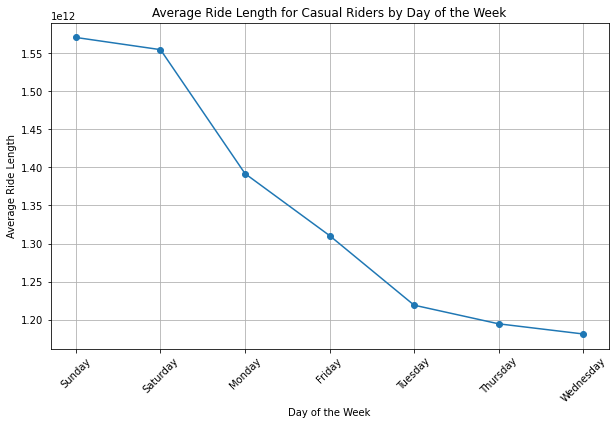

In [47]:
sorted_average_ride_length = average_ride_length_for_casuals.sort_values(by='ride_length', ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(sorted_average_ride_length.index, sorted_average_ride_length['ride_length'], marker='o', linestyle='-')
plt.title('Average Ride Length for Casual Riders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Casual riders are more active from Friday to Monday with Sundays being the most active day

#### Ads should be campaigns shuld be done on weekends for maximum reach

The number of rides for users by day_of_week

In [48]:
# Number of rides per day for member riders
weekday_rides_for_members = pd.pivot_table(
        member_riders_data,
        index=['weekday'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count')
print('The number of rides by member riders on each day of the week in descending order')
weekday_rides_for_members.sort_values(by=['ride_id', 'weekday'], ascending = False)

The number of rides by member riders on each day of the week in descending order


,ride_id
weekday,
Wednesday,493876
Thursday,487147
Tuesday,479033
Friday,443867
Monday,416752
Saturday,402257
Sunday,341526


In [49]:
# Number of rides per day for casual riders
weekday_rides_for_casuals = pd.pivot_table(
        casual_riders_data,
        index=['weekday'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count')
print('The number of rides by casual riders on each day of the week in descending order')
weekday_rides_for_casuals.sort_values(by=['ride_id', 'weekday'], ascending = False)

The number of rides by casual riders on each day of the week in descending order


,ride_id
weekday,
Saturday,423960
Sunday,328410
Friday,297057
Thursday,255661
Wednesday,237457
Monday,223193
Tuesday,221573


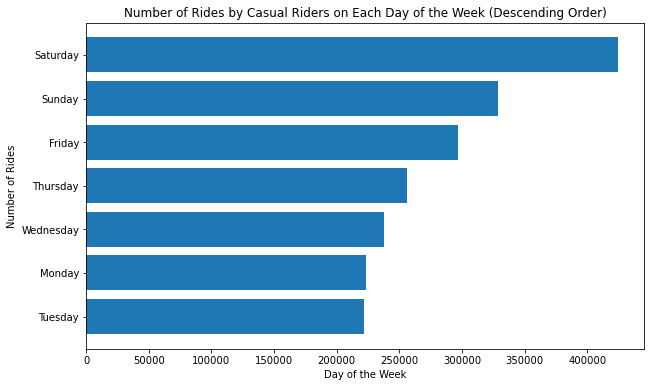

In [50]:
sorted_weekday_rides = weekday_rides_for_casuals.sort_values(by='ride_id', ascending=True)

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_weekday_rides.index, sorted_weekday_rides['ride_id'])
plt.title('Number of Rides by Casual Riders on Each Day of the Week (Descending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)  # No rotation needed for day names
plt.show()

### Stations in which casual riders start their rides the most

In [51]:
start_station_for_casuals = pd.pivot_table(
        casual_riders_data,
        index=['start_station_name'],
        values='ride_id',
        aggfunc='count')
print('Frequency of starting location of casual riders')
start_station_for_casuals.sort_values(by='ride_id', ascending = False).head(10)

Frequency of starting location of casual riders


,ride_id
start_station_name,
Streeter Dr & Grand Ave,60803
DuSable Lake Shore Dr & Monroe St,34850
Michigan Ave & Oak St,27509
Millennium Park,26389
DuSable Lake Shore Dr & North Blvd,25506
Shedd Aquarium,21946
Theater on the Lake,20075
Wells St & Concord Ln,16225
Dusable Harbor,15955


### Top 10 locations to target for casual riders campaign based on the frequency of the location at which casual members start their journey are:
1. Streeter Dr & Grand Ave
2. DuSable Lake Shore Dr & Monroe St	
3. Michigan Ave & Oak St	
4. Millennium Park	
5. DuSable Lake Shore Dr & North Blvd	
6. Shedd Aquarium	
7. Theater on the Lake	
8. Wells St & Concord Ln	
9. Dusable Harbor	
10. Indiana Ave & Roosevelt Rd	

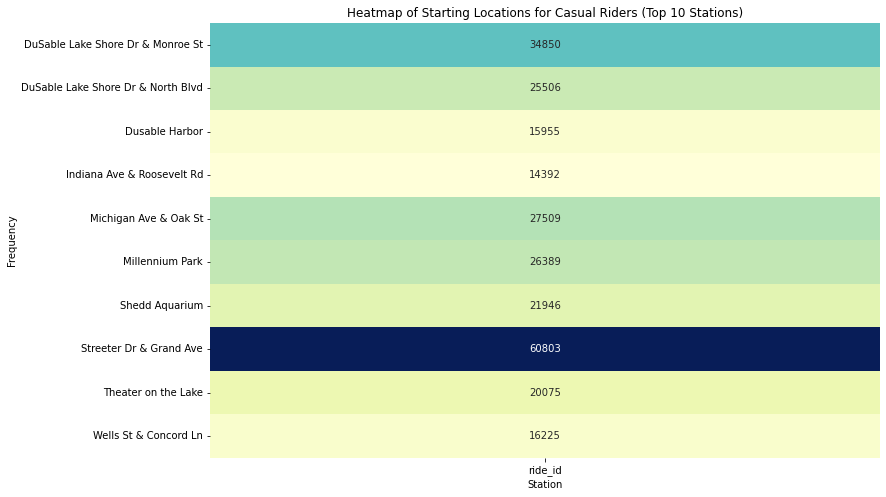

In [52]:
top_start_stations = start_station_for_casuals.sort_values(by='ride_id', ascending=False).head(10)

# Create a pivot table for the top 10 stations to prepare for the heatmap
heatmap_data = top_start_stations.pivot_table(index='start_station_name', values='ride_id', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title('Heatmap of Starting Locations for Casual Riders (Top 10 Stations)')
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Frequency of start locations for members
start_station_for_members = pd.pivot_table(
        member_riders_data,
        index=['start_station_name'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count').reset_index()
print('Frequency of starting location of casual riders')
start_station_for_members.sort_values(by='ride_id', ascending = False).head(10)

Frequency of starting location of casual riders


,start_station_name,ride_id
496,Kingsbury St & Kinzie St,26253
185,Clark St & Elm St,24019
212,Clinton St & Washington Blvd,22902
1385,Wells St & Concord Ln,22408
584,Loomis St & Lexington St,21423
208,Clinton St & Madison St,20189
1347,University Ave & 57th St,20001
1386,Wells St & Elm St,19949
313,Ellis Ave & 60th St,19570
1329,Streeter Dr & Grand Ave,18974


### Top 10 start locations for member riders
1. Kingsbury St & Kinzie St	
2. Clark St & Elm St	
3. Clinton St & Washington Blvd	
4. Wells St & Concord Ln	
5. Loomis St & Lexington St	
6. Clinton St & Madison St	
7. University Ave & 57th St	
8. Wells St & Elm St	
9. Ellis Ave & 60th St	
10. Streeter Dr & Grand Ave	

Notice that the start station locations for casual and member riders differ

In [54]:
# Frequency of end station of casual riders
end_station_for_casuals = pd.pivot_table(
        casual_riders_data,
        index=['end_station_name'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count').reset_index()
print('Frequency of end location of casual riders')
end_station_for_casuals.sort_values(by='ride_id', ascending = False).head(10)

Frequency of end location of casual riders


,end_station_name,ride_id
1486,Streeter Dr & Grand Ave,64736
303,DuSable Lake Shore Dr & Monroe St,32572
670,Michigan Ave & Oak St,29309
304,DuSable Lake Shore Dr & North Blvd,29151
677,Millennium Park,28585
1491,Theater on the Lake,21597
1408,Shedd Aquarium,20115
1548,Wells St & Concord Ln,15767
307,Dusable Harbor,15170
202,Clark St & Lincoln Ave,14341


The start and end station location is similar for casual riders, therefore focusing the campaigns at the stations listed above would be very profitable

In [55]:
end_station_for_members = pd.pivot_table(
        member_riders_data,
        index=['end_station_name'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count').reset_index()
print('Frequency of end location of casual riders')
end_station_for_members.sort_values(by='ride_id', ascending = False).head(10)

Frequency of end location of casual riders


,end_station_name,ride_id
495,Kingsbury St & Kinzie St,26181
184,Clark St & Elm St,24289
211,Clinton St & Washington Blvd,23882
1379,Wells St & Concord Ln,23416
583,Loomis St & Lexington St,21787
207,Clinton St & Madison St,20813
1341,University Ave & 57th St,20526
1380,Wells St & Elm St,20293
312,Ellis Ave & 60th St,19370
80,Broadway & Barry Ave,19327


In [102]:
# Adding the month column on the member riders dataset
member_riders_data['month'] = member_riders_data['started_at'].dt.month_name()
member_riders_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday,month
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,0 days 00:11:45,3,Tuesday,July
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,0 days 00:26:18,4,Wednesday,July
5,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.884614,-87.644564,41.867118,-87.641088,member,0 days 00:08:43,6,Friday,July
6,EFE518CCEE333669,classic_bike,2022-07-18 18:11:01,2022-07-18 18:22:30,Marquette Ave & 89th St,20239,East End Ave & 87th St,20231,41.733669,-87.558342,41.736815,-87.582801,member,0 days 00:11:29,2,Monday,July
8,EE3C4A1E66766B56,classic_bike,2022-07-10 22:55:59,2022-07-10 23:01:32,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,member,0 days 00:05:33,1,Sunday,July


In [57]:
print(member_riders_data['month'].mode())
members_month = pd.pivot_table(
        member_riders_data,
        index=['month'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count').reset_index()
print('Number of rides per month for member riders')
members_month.sort_values(by='ride_id', ascending = False).head(10)

0    July
dtype: object
Number of rides per month for member riders


,month,ride_id
5,July,662004
1,August,335230
6,June,314964
11,September,314230
8,May,286188
10,October,262945
0,April,213659
9,November,182238
7,March,153655
4,January,118663


In [103]:
# Adding the month column to the casual riders dataset
casual_riders_data['month'] = casual_riders_data['started_at'].dt.month_name()
casual_riders_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday,month
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:01:53,3,Tuesday,July
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,0 days 00:07:43,1,Sunday,July
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,0 days 00:58:29,1,Sunday,July
7,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,casual,0 days 00:30:53,5,Thursday,July
20,3327BC0B2FC92863,docked_bike,2022-07-24 19:07:19,2022-07-24 19:32:23,Canal St & Jackson Blvd,13138,Shedd Aquarium,15544,41.877245,-87.639366,41.867226,-87.615355,casual,0 days 00:25:04,1,Sunday,July


In [59]:
print(casual_riders_data['month'].mode())
casuals_month = pd.pivot_table(
        casual_riders_data,
        index=['month'],
        values='ride_id',
        # Counting the number of rides
        aggfunc='count')
print('Number of rides per month for casual riders')
casuals_month.sort_values(by='ride_id', ascending = False)

0    July
dtype: object
Number of rides per month for casual riders


,ride_id
month,
July,623356
August,270095
September,220915
June,219794
May,177039
October,151324
April,110538
November,73556
March,46792


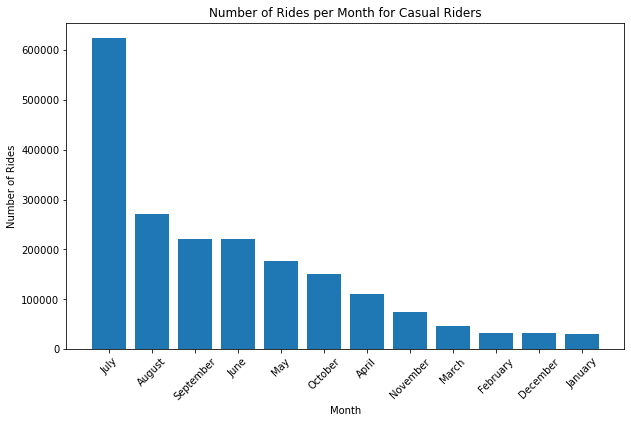

In [60]:
# Visualization of monthly rides for casual riders
sorted_casuals_month = casuals_month.sort_values(by='ride_id', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_casuals_month.index, sorted_casuals_month['ride_id'])
plt.title('Number of Rides per Month for Casual Riders')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

July is the best month to run the marketing campaign

In [65]:
sum_members = member_riders_data['ride_id'].count()
sum_members

3064458

In [66]:
sum_casuals = casual_riders_data['ride_id'].count()
sum_casuals

1987311

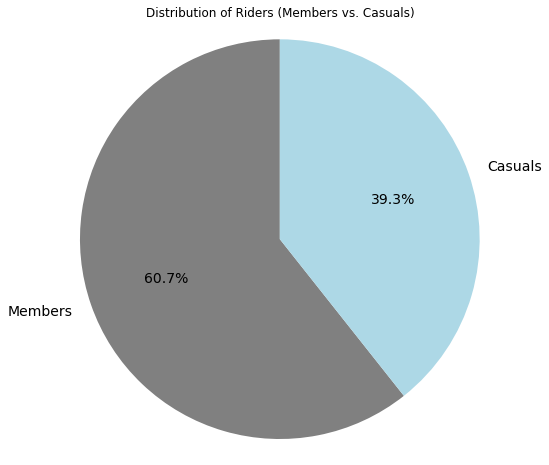

In [87]:
labels = ['Members', 'Casuals']
sizes = [sum_members, sum_casuals]
colors = ['grey', 'lightblue']  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 14}, colors=colors)
plt.title('Distribution of Riders (Members vs. Casuals)')
plt.axis('equal') 

plt.show()

In [72]:
# Bikes members ride
members_bike = pd.pivot_table(
        member_riders_data,
        index=['rideable_type'],
        values='ride_id',
        aggfunc='count').reset_index()
members_bike.sort_values(by='ride_id', ascending = False)

,rideable_type,ride_id
0,classic_bike,1907056
1,electric_bike,1157402


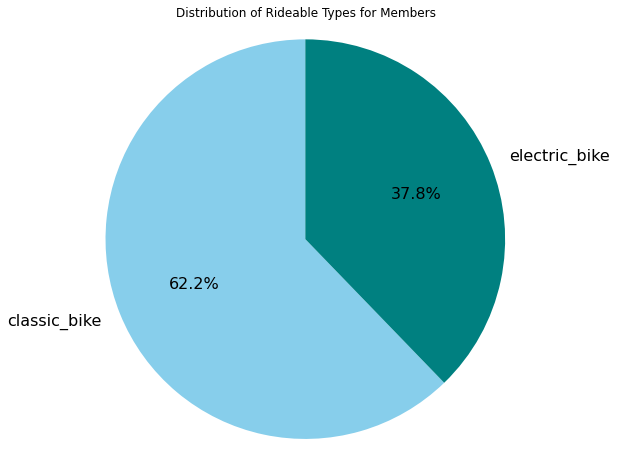

In [86]:
# Visualization of bikes ridden by members
sorted_members_bike = members_bike.sort_values(by='ride_id', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(sorted_members_bike['ride_id'], labels=sorted_members_bike['rideable_type'],textprops={'fontsize': 16}, colors = ['skyblue', 'teal'] , autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Rideable Types for Members')
plt.axis('equal') 

plt.show()

In [89]:
# Bikes casuals ride
casuals_bike = pd.pivot_table(
        casual_riders_data,
        index=['rideable_type'],
        values='ride_id',
        aggfunc='count').reset_index()
casuals_bike.sort_values(by='ride_id', ascending = False)

,rideable_type,ride_id
0,classic_bike,957606
2,electric_bike,860248
1,docked_bike,169457


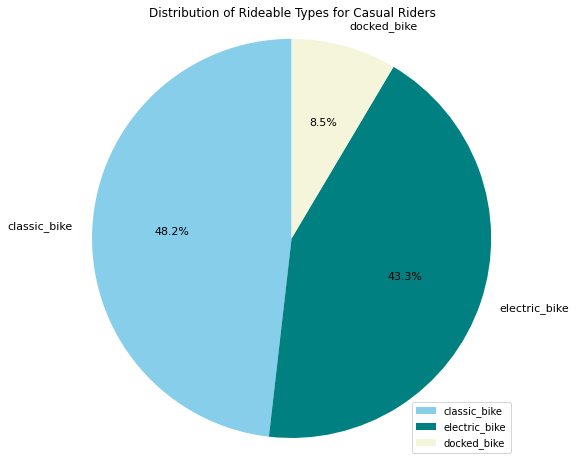

In [100]:
# Visualization of bikes ridden by casuals
sorted_casuals_bike = casuals_bike.sort_values(by='ride_id', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(sorted_casuals_bike['ride_id'], labels=sorted_casuals_bike['rideable_type'], autopct='%1.1f%%',textprops={'fontsize': 11},colors = ['skyblue', 'teal','beige'], startangle=90)
plt.title('Distribution of Rideable Types for Casual Riders')
plt.axis('equal') 
plt.legend(loc = 'lower right')
plt.show()

Casual riders have a third bike option, the docked bike

### Conclusion:


#### Findings
1. Casual riders spend more time riding bikes with over 103 casual riders having ride lengths exceeding a day as opposed to the member riders which just have 23 riders which have a ride length exceeding a day
2. Casual riders have a higher average ride time then member riders, averaging 10 minutes more
3. Casual riders are more active from Friday to Monday with Sundays being the most active day
4. Casual members ride more in July, with July having more than double the amount of riders than the next highest month

#### Recommendations:
1. Marketing campaigns should be done during the weekends to have maximum reach on the casual riders
2. The campaigns should be done in the months of July and August as they are the months with the most rides for casual members
3. Top 10 locations to target for casual riders campaign based on the frequency of the location at which casual members ride:
            Streeter Dr & Grand Ave
            DuSable Lake Shore Dr & Monroe St	
            Michigan Ave & Oak St	
            Millennium Park	
            DuSable Lake Shore Dr & North Blvd	
            Shedd Aquarium	
            Theater on the Lake	
            Wells St & Concord Ln	
            Dusable Harbor	
            Indiana Ave & Roosevelt Rd	